In [1]:
import numpy as np
import matplotlib.pyplot as plt

df = np.load('../Data/LSTM_perf_data_1.npy')
df2 = np.load('../Data/LSTM_perf_data_2_8.npy')

df = np.swapaxes(df, 0, 1)
df2 = np.swapaxes(df2, 0, 1)

padded_df2 = np.zeros((5, 1, 10))
padded_df2[:3, :, :] = df2
df = np.concatenate((df, padded_df2), axis=1)
print(df.shape)



(5, 2, 10)


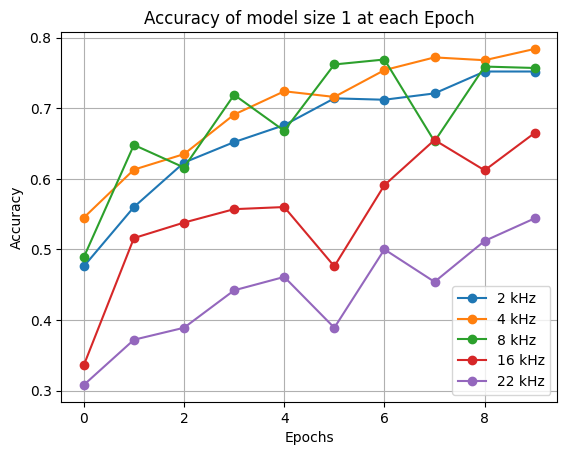

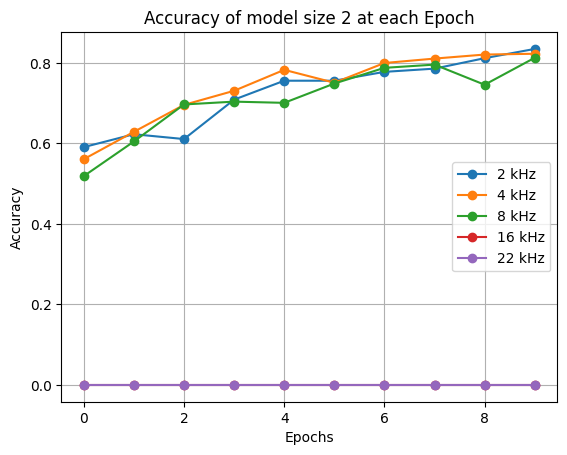

In [ ]:
KHZ = ['2', '4', '8', '16', '22']
# plt.figure(figsize=(10, 6))

for i in range(df.shape[1]):
    for j in range(df.shape[0]):
        plt.plot(df[j, i],'o-', label=f'{KHZ[j]} kHz')

    plt.title(f'Accuracy of model size {i+1} at each Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.savefig(f"../Images/LSTM_Acc_Epoch_Size{i}.png")
    plt.show()

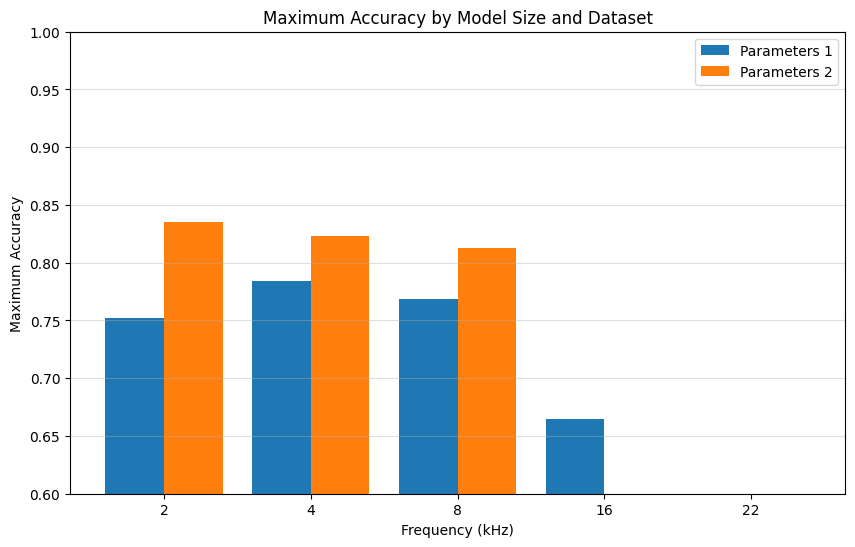

In [5]:
plt.figure(figsize=(10, 6))
max_accuracies = np.max(df, axis=2)

x = np.arange(len(KHZ))

num_params = max_accuracies.shape[1]
bar_width = 0.8 / num_params
offset = np.linspace(-(num_params-1)/2 * bar_width, (num_params-1)/2 * bar_width, num_params)

for i in range(num_params):
    plt.bar(x + offset[i], max_accuracies[:, i], width=bar_width, label=f'Parameters {i+1}')

plt.xlabel('Frequency (kHz)')
plt.ylabel('Maximum Accuracy')
plt.title('Maximum Accuracy by Model Size and Dataset')
plt.xticks(x, KHZ)
plt.ylim(0.6, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.savefig('../Images/LSTM_Acc_Model.png')
plt.show()